In [5]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import pandas as pd

                 
###########################################
imageDataURL = './ImageCsv/imgData.csv'
pd_imgs_np_train_np = pd.read_csv( imageDataURL) .to_numpy()[:,1:]

imageFeatureURL = './ImageFeatures/imgFeatures.csv'
pd_conditions_train_np = pd.read_csv( imageFeatureURL ).to_numpy()[:,1:]

In [22]:
######################################################

def euclidean_distance(v1, v2):
    return np.sqrt( np.sum(   (v1 - v2)**2   )   )

              
######################################################

def predict(test_x):

    distances = [ euclidean_distance(test_x, x )  for x in pd_conditions_train_np    ]
    k = 1
    k_neighbor_indices = np.argsort(distances)[:k]
    selected_imgs_to_avg = [ pd_imgs_np_train_np[i].reshape((360,360,4))  for i in k_neighbor_indices  ]

    print("sel img")
    print(np.array(selected_imgs_to_avg).shape)

    avg_gen_img = np.mean( np.array(selected_imgs_to_avg), axis=0)
    avg_gen_img = avg_gen_img.astype(int)

    print("avg")
    print(avg_gen_img.shape)
    return avg_gen_img

##################################################

def get_np_conditions_vector():
    c1 = float( 2 )
    c2 = float( 0 )
    c3 = float( 2 )
    c4 = float( 2 )

    conditions_list = [c1, c2, c3, c4]
    np_conditions_list = np.array(conditions_list)
    np_conditions_list = np.expand_dims(np_conditions_list, axis=0)

    return np_conditions_list

##################################################

def my_gen_function():
    test_x = get_np_conditions_vector()

    #####################################################
    text1 = str(pd_conditions_train_np.shape)
    text3 = str(pd_imgs_np_train_np.shape)
    text4 = str(test_x.shape)
    text = text1 + text3 + text4
    #print(text)
    #####################################################
    
    generated_img = predict( test_x )

    #####################################################          
    test_x = test_x.astype(int)
    str_conditions = np.array2string(test_x, precision=0, separator=',', suppress_small=True)
    str_conditions = str_conditions.replace(" ","")
    str_conditions = str_conditions.replace("[","")
    str_conditions = str_conditions.replace("]","")
    #####################################################

    print(generated_img.shape)

    fig1, ax1 = plt.subplots()
    plt.imshow(generated_img)                    
    ax1.set_title(str_conditions)

    #####################################################

sel img
(1, 360, 360, 4)
avg
(360, 360, 4)
(360, 360, 4)


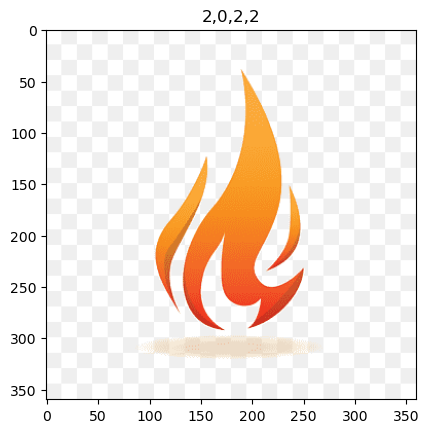

In [23]:
my_gen_function()